# Self Organized Maps

- One of the largest problems in categorization: data is more than three-dimensional.
- How do we even express large multi-dimensional data sets?
- One answer: map multi-dimensional vectors into the plane according to their similarity with others.
- This is often called a *self-organizing map.*

A self organized map is a way of sorting data into an unknown amount of data groups.
Essentially, a self organized map is a kmeans problem where the k value (number of groups) is unknown.

If you think of the famous Iris Dataset, is is clear that k=3, since there are three different types of flower (Setosa, Versicolour, and Virginica). But we don't always know that going into a problem, so self organized maps are a way of learning that.

The are somewhat complicated to build, but here is a simple walkthrough to building a self organized map (SOM)

For this problem, we will be using almost all of the packages we've used before in other problems, since SOM's bring together a lot of what we've previously learned. It's okay if a few are to you, their purpose will be explained.

In [126]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import matplotlib.lines as mlines

We will begin by reading in the data and seeing what we're working with.

In [183]:
input_data = pd.read_csv("Cash-Crop")
input_data.head()

Okay, but if we know the Crop, then why is this a self organized map? It isn't. The Crop labels are so that we can check answers at the end with what we would expect from our SOM results. You may have done a similar thing if you've worked with the Iris Data set where you compared the actual types of Iris flowers to what your code projected them to be. This is the same logic.

We will now shuffle the data and remove the Crop labels. Now we have a truely random data set.

In [ ]:
agri_data = input_data.iloc[np.random.permutation(len(input_data))]
trunc_data = agri_data[["Area", "Production", "Yield"]]
trunc_data.head(10)

Now that the data has been shuffled, we can normalize it. This allows us to represent everything as a decimal percentage of the maximum in each column. 

This is useful because the actual values are not necessary, just the relative values. This also elimates some error from outliers.

In [ ]:
trunc_data = trunc_data / trunc_data.max()
trunc_data.iloc[:10,:]

## Training the SOM
Now that we have our data properly formatted we need to "Train" the SOM.
We will use the code written by Shishir Adhikari to train the map. (The link for the github is at the top of this notebook)

We will need to use his Custom Python Library for this

In [ ]:
from SOM import SOM

If you'd like to see the code, run this next cell:

In [ ]:
%more SOM.py

Now that we have the SOM package, we can begin to train the neural network on which the Self Organized Map is optimized through.

#### What is training a neural network?
In this problem we have input data and are trying to connect them all to outputs. So for each set of input data, the neural network estimates which type of crop this is (in our case).

This essentially means we are balancing ratios of the different inputs, so we need to test different ratios for each of our inputs. In Computer Science we call this training the neural network.

##### Our Cases:
We are using the following method:
som = SOM(x_size, y_size, num_features)

In our case we have a 3x3 (9) neurons with 3 features (area, size, and yield), so this is randomly assigning 3 values to each of the 9 neurons, this is what the untrained network looks like:


In [ ]:
agri_som = SOM(3,3,3)

init_fig = plt.figure()
agri_som.show_plot(init_fig, 1, 0)
plt.show()

If you run it a few times, you'll notice that the colors are random, since we are giving the neurons random values.

Now let's actually train the network.

SOM training epoches 20
neighborhood radius  2.6878753795222865
learning rate  0.01809674836071919
-------------------------------------
SOM training epoches 40
neighborhood radius  2.4082246852806923
learning rate  0.016374615061559638
-------------------------------------
SOM training epoches 60
neighborhood radius  2.157669279974593
learning rate  0.014816364413634358
-------------------------------------
SOM training epoches 80
neighborhood radius  1.9331820449317627
learning rate  0.013406400920712786
-------------------------------------
SOM training epoches 100
neighborhood radius  1.7320508075688772
learning rate  0.012130613194252668
-------------------------------------
SOM training epoches 120
neighborhood radius  1.5518455739153598
learning rate  0.01097623272188053
-------------------------------------
SOM training epoches 140
neighborhood radius  1.3903891703159093
learning rate  0.009931706075828191
-------------------------------------
SOM training epoches 160
neighborh

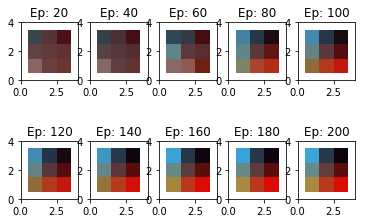

In [128]:
agri_som.train(trunc_data.values,
               num_epochs=200,
               init_learning_rate=0.02
              )

##### Observations:
The colors all start very similar then grow farther apart (but are similar shades).
The learning rate decreases time.
The neighborhood radius decreases.

###### Significance:
The colors start almost identical since all the neurons are calibrated together, then over time (the radius of comparison decreases) the neurons are separately adjusted according to the data.

The learning rate decreases because as the radius is decreasing it takes longer to calibrate each separate neuron.

The neighborhood radius decreases so that each neuron is distinct.

##### How long to calibrate?
You should calibrate for as long as it takes for the neurons to become distinct. In this case, Ep 180 is almost identical to Ep 200, so it is clear this is a good place to stop.

### Prediction:
Now we can use our neural network to predict values.
We are finding a "bmu" value and a "bmu_idx" for each set of values in our original data set.

In [129]:
def predict(df):
    bmu, bmu_idx = agri_som.find_bmu(df.values)
    df['bmu'] = bmu
    df['bmu_idx'] = bmu_idx
    return df
clustered_df = trunc_data.apply(predict, axis=1)
clustered_df.iloc[0:10]

,Area,Production,Yield,bmu,bmu_idx
56,0.023221,0.001646,0.021981,"[[0.059086017189842036, 0.013306378182806744, ...","[2, 2]"
90,0.073518,0.006734,0.028421,"[[0.059086017189842036, 0.013306378182806744, ...","[2, 2]"
51,0.035404,0.002619,0.022950,"[[0.059086017189842036, 0.013306378182806744, ...","[2, 2]"
99,0.076328,0.006387,0.025959,"[[0.059086017189842036, 0.013306378182806744, ...","[2, 2]"
84,0.142835,0.013940,0.030286,"[[0.059086017189842036, 0.013306378182806744, ...","[2, 2]"
8,0.867725,0.039430,0.014099,"[[0.8599935871565184, 0.04818555961048227, 0.0...","[2, 0]"
31,0.512706,0.353071,0.213666,"[[0.3760099053589918, 0.2404593854936522, 0.23...","[1, 1]"
4,0.813216,0.041745,0.015939,"[[0.8599935871565184, 0.04818555961048227, 0.0...","[2, 0]"
37,0.677518,0.552887,0.253177,"[[0.6633273496565368, 0.5391692676755803, 0.25...","[0, 0]"
26,0.437696,0.282736,0.200413,"[[0.3760099053589918, 0.2404593854936522, 0.23...","[1, 1]"


Now we will put the data back together with the original data and see how the neural network did!

In [130]:
joined_df = agri_data.join(clustered_df, rsuffix="_norm")
joined_df[0:10]

,Year AD,Year BS,Crop,Area,Production,Yield,Area_norm,Production_norm,Yield_norm,bmu,bmu_idx
56,1998/99,2055/56,TOBACCO,4422,3911,884,0.023221,0.001646,0.021981,"[[0.059086017189842036, 0.013306378182806744, ...","[2, 2]"
90,1990/91,2047/48,JUTE,14000,16000,1143,0.073518,0.006734,0.028421,"[[0.059086017189842036, 0.013306378182806744, ...","[2, 2]"
51,1993/94,2050/51,TOBACCO,6742,6223,923,0.035404,0.002619,0.022950,"[[0.059086017189842036, 0.013306378182806744, ...","[2, 2]"
99,1999/2000,2056/57,JUTE,14535,15175,1044,0.076328,0.006387,0.025959,"[[0.059086017189842036, 0.013306378182806744, ...","[2, 2]"
84,1984/85,2041/42,JUTE,27200,33124,1218,0.142835,0.013940,0.030286,"[[0.059086017189842036, 0.013306378182806744, ...","[2, 2]"
8,1992/93,2049/50,OILSEED,165240,93690,567,0.867725,0.039430,0.014099,"[[0.8599935871565184, 0.04818555961048227, 0.0...","[2, 0]"
31,1994/95,2051/52,POTATO,97634,838932,8593,0.512706,0.353071,0.213666,"[[0.3760099053589918, 0.2404593854936522, 0.23...","[1, 1]"
4,1988/89,2045/46,OILSEED,154860,99190,641,0.813216,0.041745,0.015939,"[[0.8599935871565184, 0.04818555961048227, 0.0...","[2, 0]"
37,2000/2001,2057/58,POTATO,129019,1313717,10182,0.677518,0.552887,0.253177,"[[0.6633273496565368, 0.5391692676755803, 0.25...","[0, 0]"
26,1989/90,2046/47,POTATO,83350,671810,8060,0.437696,0.282736,0.200413,"[[0.3760099053589918, 0.2404593854936522, 0.23...","[1, 1]"


Now let's plot these estimations using matplots. This part of the code is only for your visualization, and is not actually required (but it is reccomended).

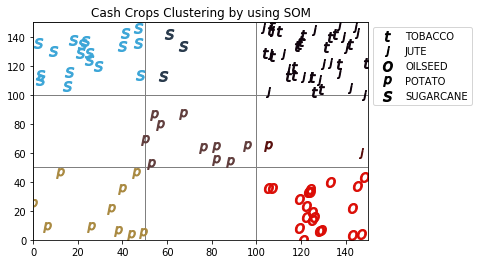

In [131]:
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import matplotlib.lines as mlines

fig = plt.figure()
# setup axes
ax = fig.add_subplot(111)
scale = 50
ax.set_xlim((0, agri_som.net.shape[0]*scale))
ax.set_ylim((0, agri_som.net.shape[1]*scale))
ax.set_title("Cash Crops Clustering by using SOM")

for x in range(0, agri_som.net.shape[0]):
    for y in range(0, agri_som.net.shape[1]):
        ax.add_patch(patches.Rectangle((x*scale, y*scale), scale, scale,
                     facecolor='white',
                     edgecolor='grey'))
legend_map = {}
        
for index, row in joined_df.iterrows():
    x_cor = row['bmu_idx'][0] * scale
    y_cor = row['bmu_idx'][1] * scale
    x_cor = np.random.randint(x_cor, x_cor + scale)
    y_cor = np.random.randint(y_cor, y_cor + scale)
    color = row['bmu'][0]
    marker = "$\\ " + row['Crop'][0]+"$"
    marker = marker.lower()
    ax.plot(x_cor, y_cor, color=color, marker=marker, markersize=10)
    label = row['Crop']
    if not label in legend_map:
        legend_map[label] =  mlines.Line2D([], [], color='black', marker=marker, linestyle='None',
                          markersize=10, label=label)
plt.legend(handles=list(legend_map.values()), bbox_to_anchor=(1, 1))
plt.show()

##### Source:
SOM function from [here][1]


Data set and code [here][2]

[1]: https://github.com/sevamoo/SOMPY/ 
[2]: https://machinelearningnepal.com/2018/01/17/online-som/ 

### Analysis:
We can see from the data that for the 9 neurons, there were only 5 different types of crops.

There are two different groupings of p. This means that potatoes have a large variety within the data.

The Jute and Tobacco groups are morfed together, this means they are very similar in terms of their data and are hard to distinguish.

Oilseed characteristics are very unique and are grouped closely.

Sugarcane is realatively grouped together; however, there are a few uncertain points (and one that closely corresponds to Jute and Tobacco).

## Background Math:
The math going on is extremely complicated, but you can read up on it online if you still have questions. In simple terms, the SOM math runs off of Euclidean distances:

d = abs(x(t) - w(t))^2.

**Where:**
- D is the euclidean distance
- x(t) is the input vector
- w(t) is the weight vector from the neurons

##### Process:
* Pick a random x(t) and find the node that minimizes d.
* Update the nodes by "pulling them closer" to the node that minimized d.
* Repeat for a set number of iterations.

# Now Try This:
Now you'll follow the same process as before. This time, use the data set for fruit throwing. 

In [132]:
# Don't change this cell; just run it. 
from client.api.notebook import Notebook
ok = Notebook('SOM.ok')
ok.auth(inline=True)

**Q01**
Import the Fruit csv as "fruit" in the cell below.

In [182]:

_ = ok.grade('q01')

**Q02**
Randomize, normalize the data, and take only the columns we need.

Name the randomized data "fruit_data_rand" and the finalized data "fruit_data"

In [134]:

_ = ok.grade('q02')

Splatter    0.000246
Speed       0.000117
Damage      0.000012
dtype: float64

**q03** Initialize a SOM named "fruit_som" and then train it.

SOM training epoches 20
neighborhood radius  2.6878753795222865
learning rate  0.009048374180359595
-------------------------------------
SOM training epoches 40
neighborhood radius  2.4082246852806923
learning rate  0.008187307530779819
-------------------------------------
SOM training epoches 60
neighborhood radius  2.157669279974593
learning rate  0.007408182206817179
-------------------------------------
SOM training epoches 80
neighborhood radius  1.9331820449317627
learning rate  0.006703200460356393
-------------------------------------
SOM training epoches 100
neighborhood radius  1.7320508075688772
learning rate  0.006065306597126334
-------------------------------------
SOM training epoches 120
neighborhood radius  1.5518455739153598
learning rate  0.005488116360940265
-------------------------------------
SOM training epoches 140
neighborhood radius  1.3903891703159093
learning rate  0.004965853037914096
-------------------------------------
SOM training epoches 160
neighbo

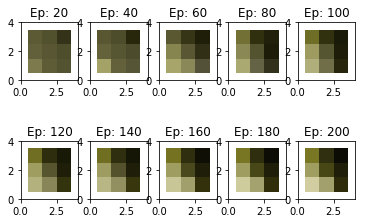

In [135]:

_=ok.grade('q03')

Create the new predict_fruit function:

In [136]:
def predict_fruit(df):
    bmu, bmu_idx = fruit_som.find_bmu(df.values)
    df['bmu'] = bmu
    df['bmu_idx'] = bmu_idx
    return df

**Q04**Use the SOM to predict the data points, then join this prediction with the original data set. Name the joined dataframe "joined_fruit"

In [137]:

_ = ok.grade('q04')

,Date,Fruit,Splatter,Speed,Damage,Splatter_norm,Speed_norm,Damage_norm,bmu,bmu_idx
11,Tuesday,Pumpkin,21.810425,3.468898,106.107625,0.699833,0.648582,0.981638,"[[0.8180578589789991, 0.805411745539204, 0.626...","[0, 0]"
14,Friday,Pumpkin,20.564656,3.653836,108.092451,0.659860,0.683160,1.000000,"[[0.8180578589789991, 0.805411745539204, 0.626...","[0, 0]"
2,Wednesday,Apple,2.133948,0.305531,0.050672,0.068472,0.057125,0.000469,"[[0.048270077512462206, 0.046050780299677026, ...","[2, 2]"
7,Wednesday,Banana,10.053362,1.856171,11.914195,0.322583,0.347049,0.110222,"[[0.27917668089537184, 0.27977105669969743, 0....","[1, 1]"
20,Monday,Grape,0.092053,0.011250,0.001812,0.002954,0.002103,0.000017,"[[0.048270077512462206, 0.046050780299677026, ...","[2, 2]"
21,Tuesday,Grape,0.058000,0.004586,0.001325,0.001861,0.000858,0.000012,"[[0.048270077512462206, 0.046050780299677026, ...","[2, 2]"
22,Wednesday,Grape,0.007676,0.000623,0.005952,0.000246,0.000117,0.000055,"[[0.048270077512462206, 0.046050780299677026, ...","[2, 2]"
13,Thursday,Pumpkin,20.036943,3.562257,102.893000,0.642927,0.666037,0.951898,"[[0.8180578589789991, 0.805411745539204, 0.626...","[0, 0]"
32,Wednesday,Watermelon,15.379357,2.539662,15.259097,0.493479,0.474842,0.141167,"[[0.48010532269052936, 0.46832529803904727, 0....","[0, 2]"
27,Wednesday,Orange,4.837400,0.685751,2.233768,0.155218,0.128215,0.020665,"[[0.1196103046934729, 0.11792587440860239, 0.0...","[2, 1]"


Plot the data.

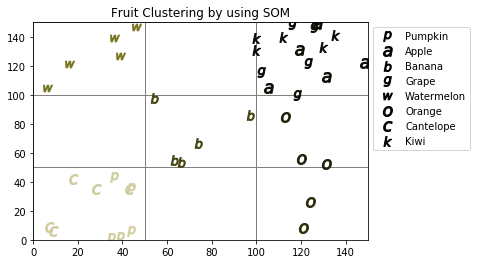

**Q05** For each question, change the respective variable to the correct answer. Make sure to think about why each one is that way.
- Which fruit(s) were the most isolated? (All members are the only members in a box)
- If you ran this again you would necessarily get identical results. (T/F)
- If we had infinite training epoches, all the clusters would be separated. (T/F)
- If we got rid of Grape the clusters would be more spread out. (T/F)


In [172]:
isolated = ["Fruit1","Fruit2","etc."]

again = True or False

epoches = True or False

No_G = True or False

_= ok.grade('q05')

#### Challenge:
In this question, I'm going to tell you I have an unknown fruit with the follow statistics:
- Splatter = 20
- Speed = 5
- Damage = 32

Perform the following tasks:
- Set "weighted" equal to a list of the weighted values for Splatter, Speed, and Damage for this fruit.
- Make "extra" a dataframe in which the first row contains these weighted values.
- Set "fruit_guess" equal to the fruit that the program tells us this is.
- Do ***you*** agree with the estimated guess? If you don't, and I told you the Splatter value could be too low, what type of fruit do you think it is? 
    - Set "guess" equal to if you agree or not (T/F)
    - If you said no (F), set "my_guess" equal to your guess, and think about why this is not the answer the SOM gave.


In [181]:

_ = ok.grade('q06')

,Damage,Speed,Splatter,bmu,bmu_idx
0,0.296044,3.65384,0.914256,"[[0.2306279672506119, 0.6474611152137217, 0.84...","[0, 2]"
